In [1]:
import sys

sys.path.append("../..")

In [2]:
import umap
import umap.plot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle

/usr/local/Caskroom/miniconda/base/envs/aicpmlr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open('../../args.pickle', 'rb') as handle:
    args = pickle.load(handle)

with open('../../representations.pickle', 'rb') as handle:
    representations = pickle.load(handle)

In [ ]:
N_NEIGHBORS = [20, 200, 2000]
MIN_DIST = [0.0, 0.5, 0.99]

In [ ]:
def visualize_embeddings(representations: dict):
    """Visualize embeddings.

    Args:
        representations (dict): Dictionary of representations datasets.
        args (Namespace): Arguments.
    """
    cmap = mpl.cm.tab10

    x_train = representations["train"].data.reshape(-1, 256)
    x_val = representations["val"].data.reshape(-1, 256)
    x_test = representations["test"].data.reshape(-1, 256)
    y_train = representations["train"].labels.reshape(-1)
    y_val = representations["val"].labels.reshape(-1)
    y_test = representations["test"].labels.reshape(-1)

    # join train, val, test for PCA and form labels giving source
    x_all = np.concatenate([x_train, x_val, x_test])
    y_all = np.concatenate([y_train, y_val, y_test])

    reducers = {
        "UMAP_nn=20_md=0.0": umap.UMAP(random_state=42, n_neighbors=20, min_dist=0.0),
        "UMAP_nn=200_md=0.5": umap.UMAP(random_state=42, n_neighbors=200, min_dist=0.5),
        "UMAP_nn=2000_md=0.99": umap.UMAP(random_state=42, n_neighbors=2000, min_dist=0.99),
    }

    pca = PCA(n_components=4).fit(x_all)
    x_pca_train = pca.transform(x_train)
    x_pca_val = pca.transform(x_val)
    x_pca_test = pca.transform(x_test)
    x_pca_all = np.concatenate([x_pca_train, x_pca_val, x_pca_test])

    subsample = x_pca_all[np.random.choice(x_all.shape[0], int(0.1 * x_all.shape[0]), replace=False)]
    for name, reducer in reducers.items():
        print(f"Visualizing {name}")
        # fit reducer on 10% of data (randomly sampled)
        print(f"Fitting {name}")
        reducer.fit(subsample)

        print(f"Plotting {name}", end=" ")
        fig, axs = plt.subplots(1, 2, figsize=(22, 10))
        # plot embeddings colored by source
        embedding = reducer.transform(x_pca_train)
        axs[0].scatter(embedding[:, 0], embedding[:, 1], c="c", s=2)
        print(".", end="")
        embedding = reducer.transform(x_pca_val)
        axs[0].scatter(embedding[:, 0], embedding[:, 1], c="m", s=2)
        print(".", end="")
        embedding = reducer.transform(x_pca_test)
        axs[0].scatter(embedding[:, 0], embedding[:, 1], c="y", s=2)
        print(".")
        axs[0].legend(["train", "val", "test"])
        axs[0].set_title(f"{name} source")
        # plot embeddings colored by label
        embedding = reducer.transform(x_pca_all)
        axs[1].scatter(embedding[:, 0], embedding[:, 1], c=y_all, cmap=cmap, s=2)
        fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=7)), ticks=np.arange(8), ax=axs)
        axs[1].set_title(f"{name} label")
        fig.savefig(f"{name}.png", dpi=300)
        plt.close(fig)

In [ ]:
visualize_embeddings(representations)

In [ ]:
x_train = representations["train"].data.reshape(-1, 256)
x_val = representations["val"].data.reshape(-1, 256)
x_test = representations["test"].data.reshape(-1, 256)
# join train, val, test for PCA and form labels giving source
x_all = np.concatenate([x_train, x_val, x_test])

In [ ]:
pca = PCA(n_components=10)
pca.fit(x_all)
# create scree plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.arange(1, 11), pca.explained_variance_ratio_, "o-")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Proportion of Explained Variance")
ax.set_title("Scree Plot")
fig.savefig("scree_plot.png", dpi=300)
plt.close(fig)

In [ ]:
x_train = representations["train"].data.reshape(-1, 256)
x_val = representations["val"].data.reshape(-1, 256)
x_test = representations["test"].data.reshape(-1, 256)
y_train = representations["train"].labels.reshape(-1)
y_val = representations["val"].labels.reshape(-1)
y_test = representations["test"].labels.reshape(-1)

# join train, val, test for PCA and form labels giving source
x_all = np.concatenate([x_train, x_val, x_test])
y_all = np.concatenate([y_train, y_val, y_test])

y_src = np.concatenate(
    [np.ones_like(y_train) * 0, np.ones_like(y_val) * 1, np.ones_like(y_test) * 2]
)


In [ ]:
def plot_umap(x, ys, n_neighbors=15, min_dist=0.1, titles=["UMAP"]):
    mapper = umap.UMAP(random_state=42, n_neighbors=n_neighbors, min_dist=min_dist).fit(x)

    for y, title in zip(ys, titles):
        fig, ax = plt.subplots(figsize=(10, 10))
        umap.plot.points(mapper, labels=y, ax=ax)
        ax.set_title(title)
        fig.savefig(f"{title}.png", dpi=300)

In [ ]:
# idx = np.random.choice(x_all.shape[0], 10000, replace=False)
plot_umap(
    x_all,
    [y_all, y_src],
    n_neighbors=15,
    min_dist=0.1,
    titles=["UMAP subset colored by action", "UMAP subset colored by source"],
)


In [ ]:
umap.plot.connectivity(mapper, edge_bundling=None)

In [ ]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

In [4]:
from emgrep.visualizations import visualize_embeddings
from argparse import Namespace
import wandb

In [5]:
wandb.init(project="emgrep_debug", entity="b1t0", mode="offline")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


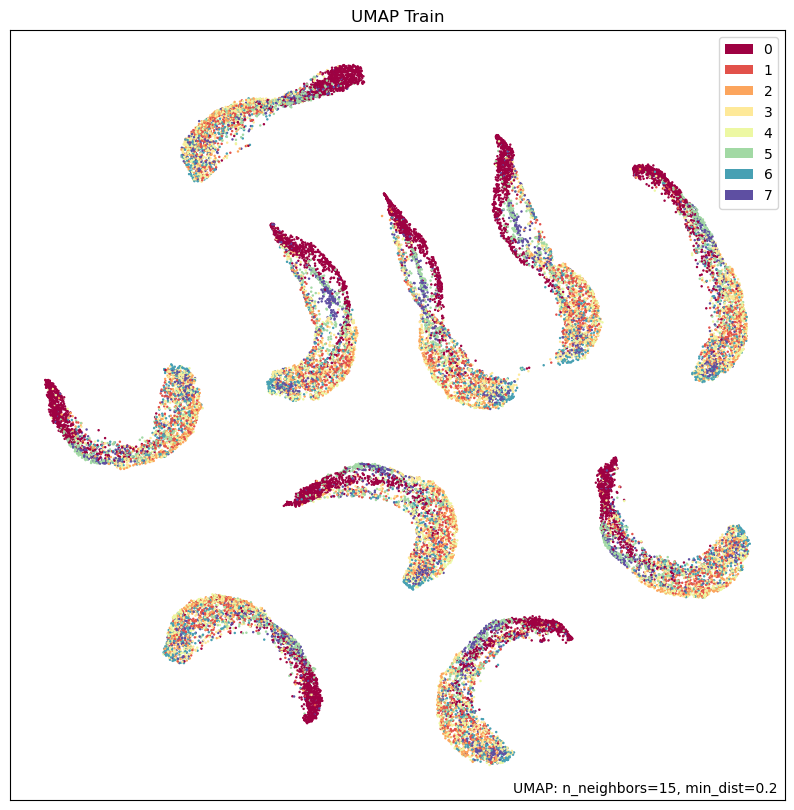

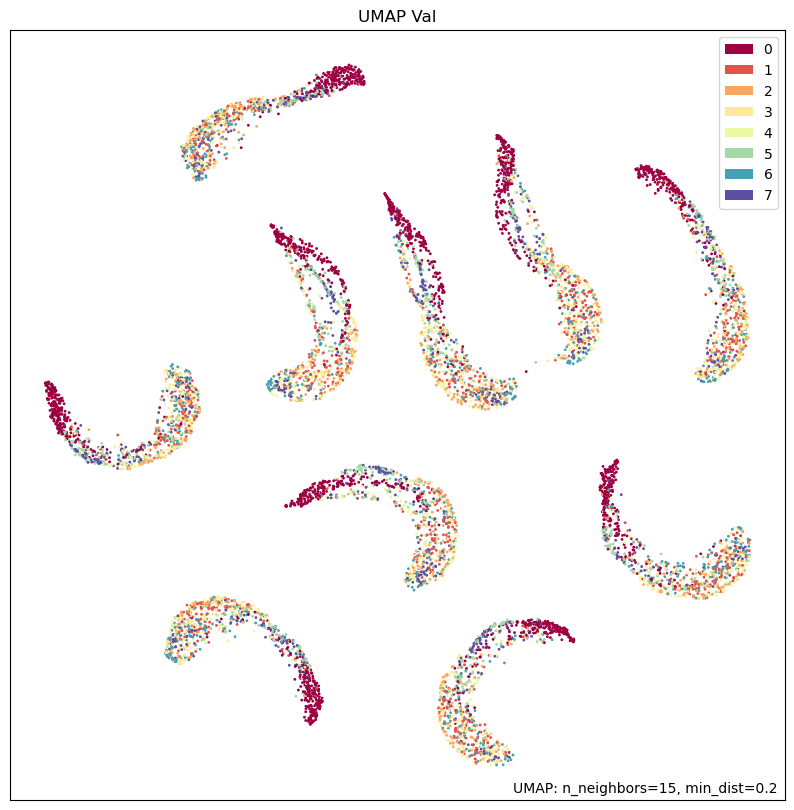

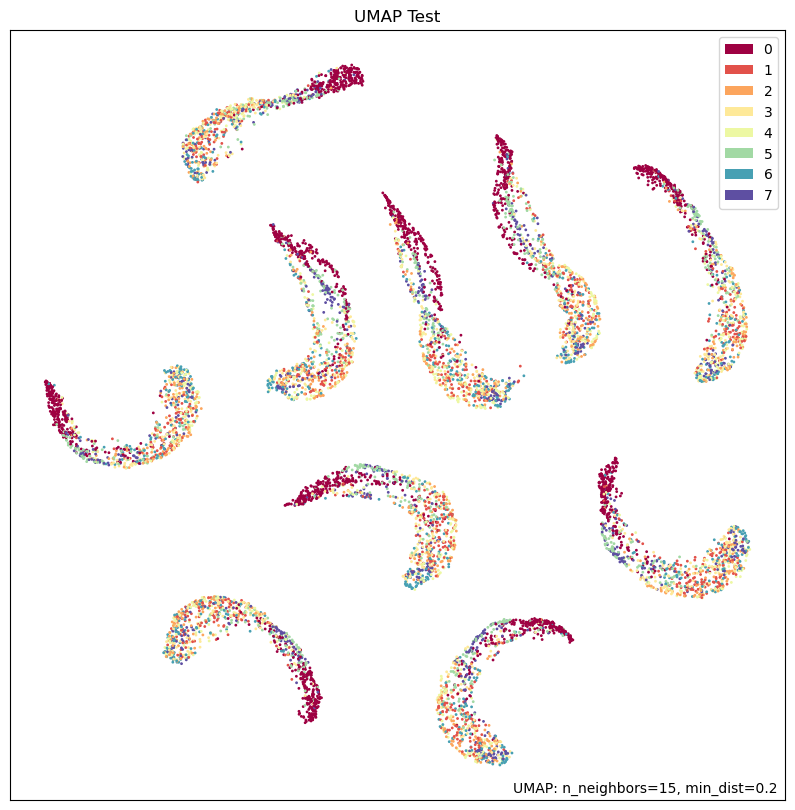

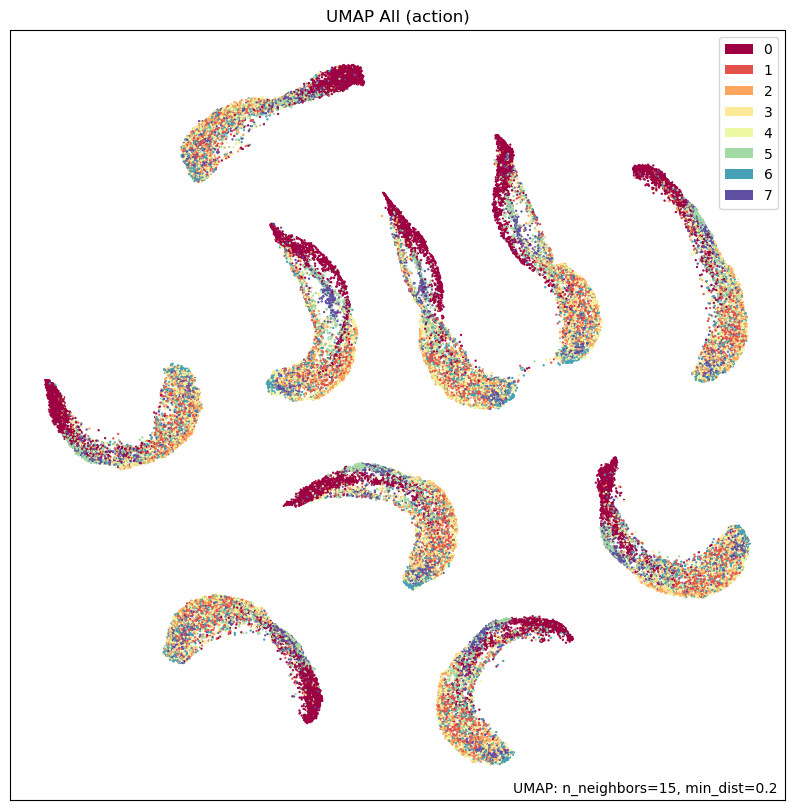

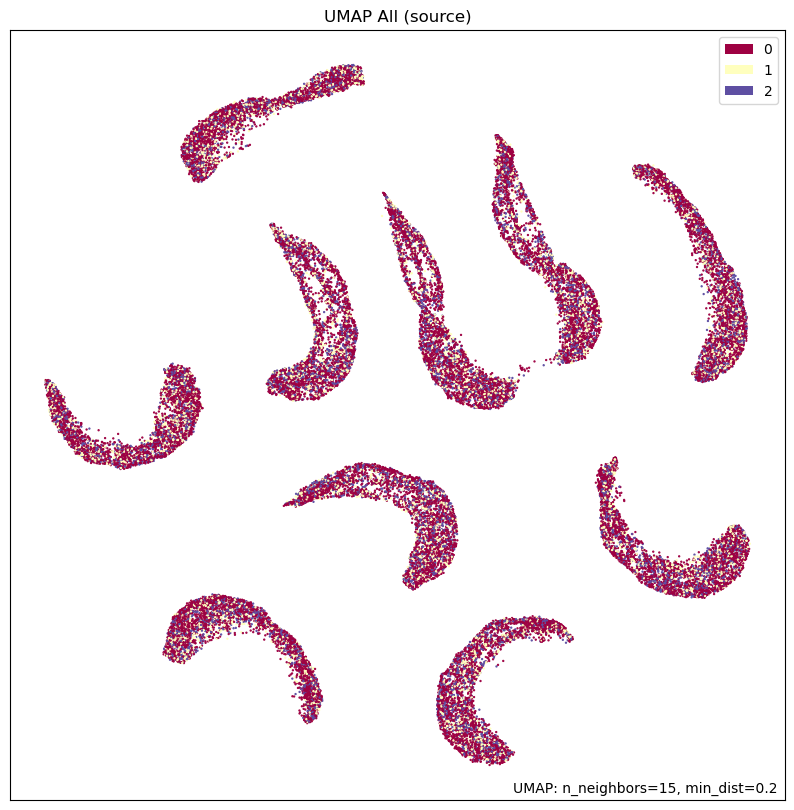

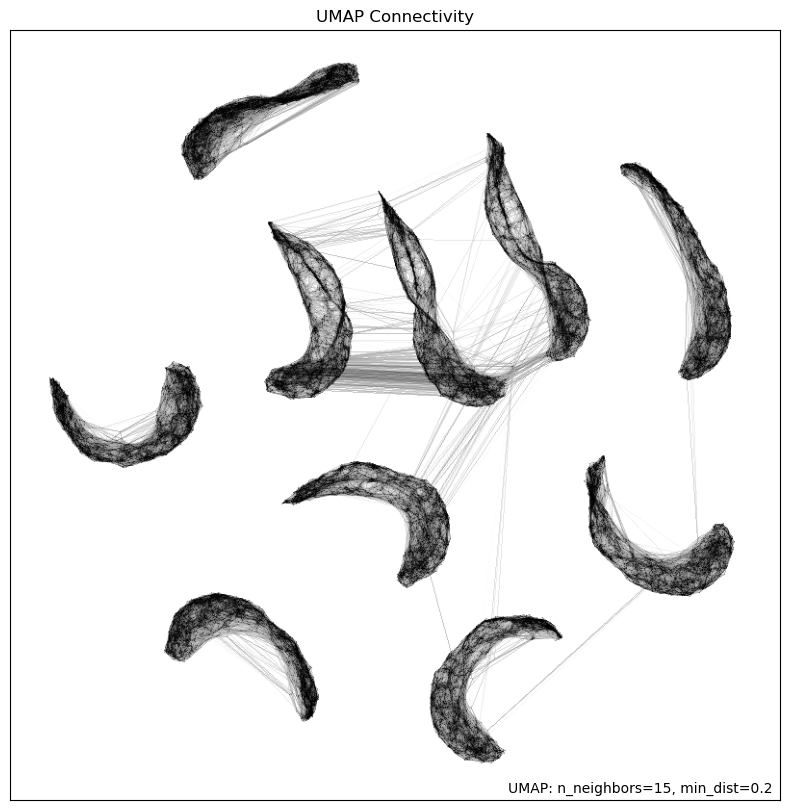

In [6]:
visualize_embeddings(representations, Namespace(debug=True))

'<function visualize_embeddings at 0x7ff440448310>'